# Landslide Prediction

# Business Problem

**1. Context**

A government and geodata-consultant tried to analyze the observed data with various features from the severe earthquake on 12th May 2008, with magnitude 8.0, that shocked the Wenchuan area, Northwestern Sichuan Province, China. This natural phenomena led to the landslide-dammed lakes (“earthquake lakes”), debris flow, and rock avalanches – landslide which caused the most fatalities during that hazard event. The earthquake occurred along the Northeast oriented Longmenshan fault zone due to the collision between the Indian Plate and Eurasian Plate in conjunction with the eastern part of the Tibetan block and western part of the Sichuan Basin (Cui et al., 2011). The Longmen mount fault zone, and its surrounding area, have a humid subtropical climate which is common to the heavy rainfall (160 mm/day in 145 locations) between June and September, which is evident to the external dynamic conditions for the loose accumulation failure (Gan and Zhang, 2019). Therefore, by the geological fact, the area is prone to topographic movement like slide, collapse, erosion, and debris flow, even without the driving force of tectonic activity.

Prediction of landslides can be done if supported by the existence of data with representative features. Predicting landslides can be useful for stakeholders either government or third party to mitigate landslides. Landslide mitigation helps to minimize casualties and damages, thus machine learning modeling for landslide prediction is the appropriate solution. From the machine learning modeling, stakeholders can also estimate the budget needed for the landslide mitigation program, including taking into account the occurrence of false alarms from the weakness of machine learning modeling. Budget calculation for landslide mitigation by considering the evaluation of machine learning modeling is important so that the preparation of funds that need to be provided can be sufficient, not more or not less. Stakeholders can utilize predictions from machine learning models as a tool for landslide mitigation. Therefore, this task is important to support the landslide mitigation process planned by the stakeholders.


**2. Problem Statement**

How can we predict the likelihood of a landslide to occur? This prediction is crucial to provide landslide mitigation effectively. The application of machine learning methods is essential to facilitate predictions, offer more quantifiable insights, and provide recommendations.


**3. Goals**

The goal is for the stakeholders to predict the likelihood of a landslide to occur. This approach aims to make the stakeholders formulate strategies to mitigate the occurrence of landslides, in order to reduce the possibility of casualties and damages.


**4. Analytical Approach**

Our approach involves constructing a classification model in predicting the probability that a landslide will occur and provides an evaluation of what are the factors that influence the occurrence of landslides.


**5. Metrics**

   1. Accuracy: in this context would measure the overall correctness of the model's predictions. It tells us how often the model correctly predicts both landslide will occur and will not occur. However, if the dataset has imbalanced classes (more of one class than the other), high accuracy might be misleading as the model could simply predict the majority class.

   2. Recall: would be crucial to capture as many landslide as possible, we also need to consider getting a model with minimum false negatives, because it will be dangerous if it has a relatively high false negative value because it indicates a landslide but the model predicts a landslide did not happen which will be detrimental and dangerous.

   3. Precision: it is important to ensure that when the model predicts a landslide event, it is likely to be correct. High precision indicates that landslide events predicted to occur are more likely to happen, leading to better landslide mitigation because the model can predict well.

   4. F1-Score: is a combination of Precision and Recall. It's useful when we need to strike a balance between identifying as many positive cases as possible (Recall) while ensuring that those predictions are accurate (Precision). It helps to assess the overall effectiveness of the model.

   5. ROC-AUC Curve: is a representation of the trade-off between Sensitivity (Recall) and Specificity (1 - False Positive Rate). A model with a high ROC-AUC value indicates that the model is effective in distinguishing between landslides that will and will not occur.

In summary, for this classification task, we want to maximize the precision to predict the occurrence of landslides and the ROC-AUC Curve provides insight into the overall strength of the model.

# Data Understanding

| Attribute | Description |
| --- | --- |
| ID | ID of data point |
| aspect | Slope exposition [°] |
| strdist | Distance to stream [m] |
| basarea | Catchment size [m^2] |
| basin | Catchment |
| curvature | Slope curvature (+ convex; - concave) |
| curve_cont | Contour-parallel slope curvature |
| curve_prof | Profile-parallel slope curvature |
| curves | Change in height derived from slope [m] |
| drop | Absolute change in height above valley floor [m] |
| rockdist | Distance to rock [m] |
| flowdir | Flow direction [°] |
| fos | Factor of safety for shallow landslides |
| lith | Rock type; has been encoded |
| elev | Elevation [m a.s.l.] |
| cohesion | Cohesion [kN/m^2] |
| scarpdist | Distance to failure scarps [m] |
| scarps | 0 – No failure scap, 1 – failure scap |
| frictang | Friction angle |
| slope | Slope gradient [°] |
| slopeleg | Length of slope [m] |
| woods | 0 – No vegetation, 1 – occurrence of vegetation |
| specwt | Specific weight [kN/m^3] |
| slide | 0 – No occurrence of landslide, 1 – occurrence |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import missingno as msno
%matplotlib inline

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, roc_curve, roc_auc_score
from sklearn.datasets import make_regression

from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier

from scipy import stats

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.metrics import make_index_balanced_accuracy

### Data Loading

In [2]:
data = r'Landslide Data.csv'
df = pd.read_csv(data, sep=',', header=0, na_values='.')
df.head()

,ID,aspect,strdist,basarea,basin,curvature,curve_cont,curve_prof,curves,drop,...,elev,cohesion,slide,scarpdist,scarps,frictang,slope,slopeleg,woods,specwt
0,1,247.0482,664.8308,65600,1,3.020935,-2.463763,0.5571716,0.1392548,37.5,...,1061.306,MISSING,MISSING,20.00000,0.0,MISSING,11.15498,MISSING,MISSING,MISSING
1,2,253.3718,642.8063,65600,1,-1.277527,0.5579144,-0.7196125,0.1301211,15,...,1051.781,MISSING,MISSING,40.00000,0.0,MISSING,13.4683,2033.702,1,MISSING
2,3,265.2971,644.9806,65600,1,-2.156464,0.6360565,-1.520407,0.214373,25,...,1057.005,10,1,28.28427,0.0,23,15.3465,2024.026,1,19
3,4,267.3936,647.7654,65600,1,2.61673,-2.301352,0.3153775,0.1357629,40,...,1065.42,10,1,20.00000,0.0,23,12.92921,2015.106,1,19
4,5,MISSING,651.1528,MISSING,MISSING,MISSING,MISSING,MISSING,MISSING,MISSING,...,MISSING,10,1,0.00000,1.0,23,MISSING,MISSING,1,19


The target for this landslide prediction machine learning modeling is the `slide` feature.

In [3]:
slide_column = df.pop('slide')
df['slide'] = slide_column

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21010 entries, 0 to 21009
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          21010 non-null  int64  
 1   aspect      21010 non-null  object 
 2   strdist     21010 non-null  float64
 3   basarea     21010 non-null  object 
 4   basin       21010 non-null  object 
 5   curvature   21010 non-null  object 
 6   curve_cont  21010 non-null  object 
 7   curve_prof  21010 non-null  object 
 8   curves      21010 non-null  object 
 9   drop        21010 non-null  object 
 10  rockdist    21010 non-null  int64  
 11  flowdir     21010 non-null  object 
 12  fos         21010 non-null  object 
 13  lith        21010 non-null  object 
 14  elev        21010 non-null  object 
 15  cohesion    21010 non-null  object 
 16  scarpdist   21010 non-null  float64
 17  scarps      21003 non-null  float64
 18  frictang    21010 non-null  object 
 19  slope       21010 non-nul

In [5]:
categoric_df = df.select_dtypes(include="object")

column = categoric_df.columns
unique = [categoric_df[i].unique() for i in column]
n_unique = [len(categoric_df[i].unique()) for i in column]

pd.DataFrame({
    'column': column,
    'n_unique': n_unique,
    'unique': unique
})

,column,n_unique,unique
0,aspect,20749,"[247.0482, 253.3718, 265.2971, 267.3936, MISSI..."
1,basarea,40,"[65600, MISSING, 91600, 32800, 162800, 16400, ..."
2,basin,49,"[1, MISSING, 5, 2, 3, 4, 6, 10, 8, 9, 17, 11, ..."
3,curvature,19917,"[3.020935, -1.277527, -2.156464, 2.61673, MISS..."
4,curve_cont,20843,"[-2.463763, 0.5579144, 0.6360565, -2.301352, M..."
5,curve_prof,20837,"[0.5571716, -0.7196125, -1.520407, 0.3153775, ..."
6,curves,20801,"[0.1392548, 0.1301211, 0.214373, 0.1357629, MI..."
7,drop,156,"[37.5, 15, 25, 40, MISSING, 22.5, 42.5, 20, 27..."
8,flowdir,9,"[16, MISSING, 32, 64, 128, 4, 8, 1, 2]"
9,fos,20737,"[MISSING, 1.31829, 1.094124, 1.066489, 1.02914..."


In general, we can see that:
* the dataset has 19 columns
* the dataset has 5 columns of numeric type and 14 columns of object type. Even so, when viewed based on the value in each categorical feature, all of these categorical features should be numerical features because they contain numbers. Changing the categorical data type to numeric either it will be integer or float will be conducted in the preprocessing section.

# Preprocessing

### Handling Missing Value

In [6]:
#Change the 'Missing' with NaN
df = df.replace('MISSING', np.nan)

<Axes: >

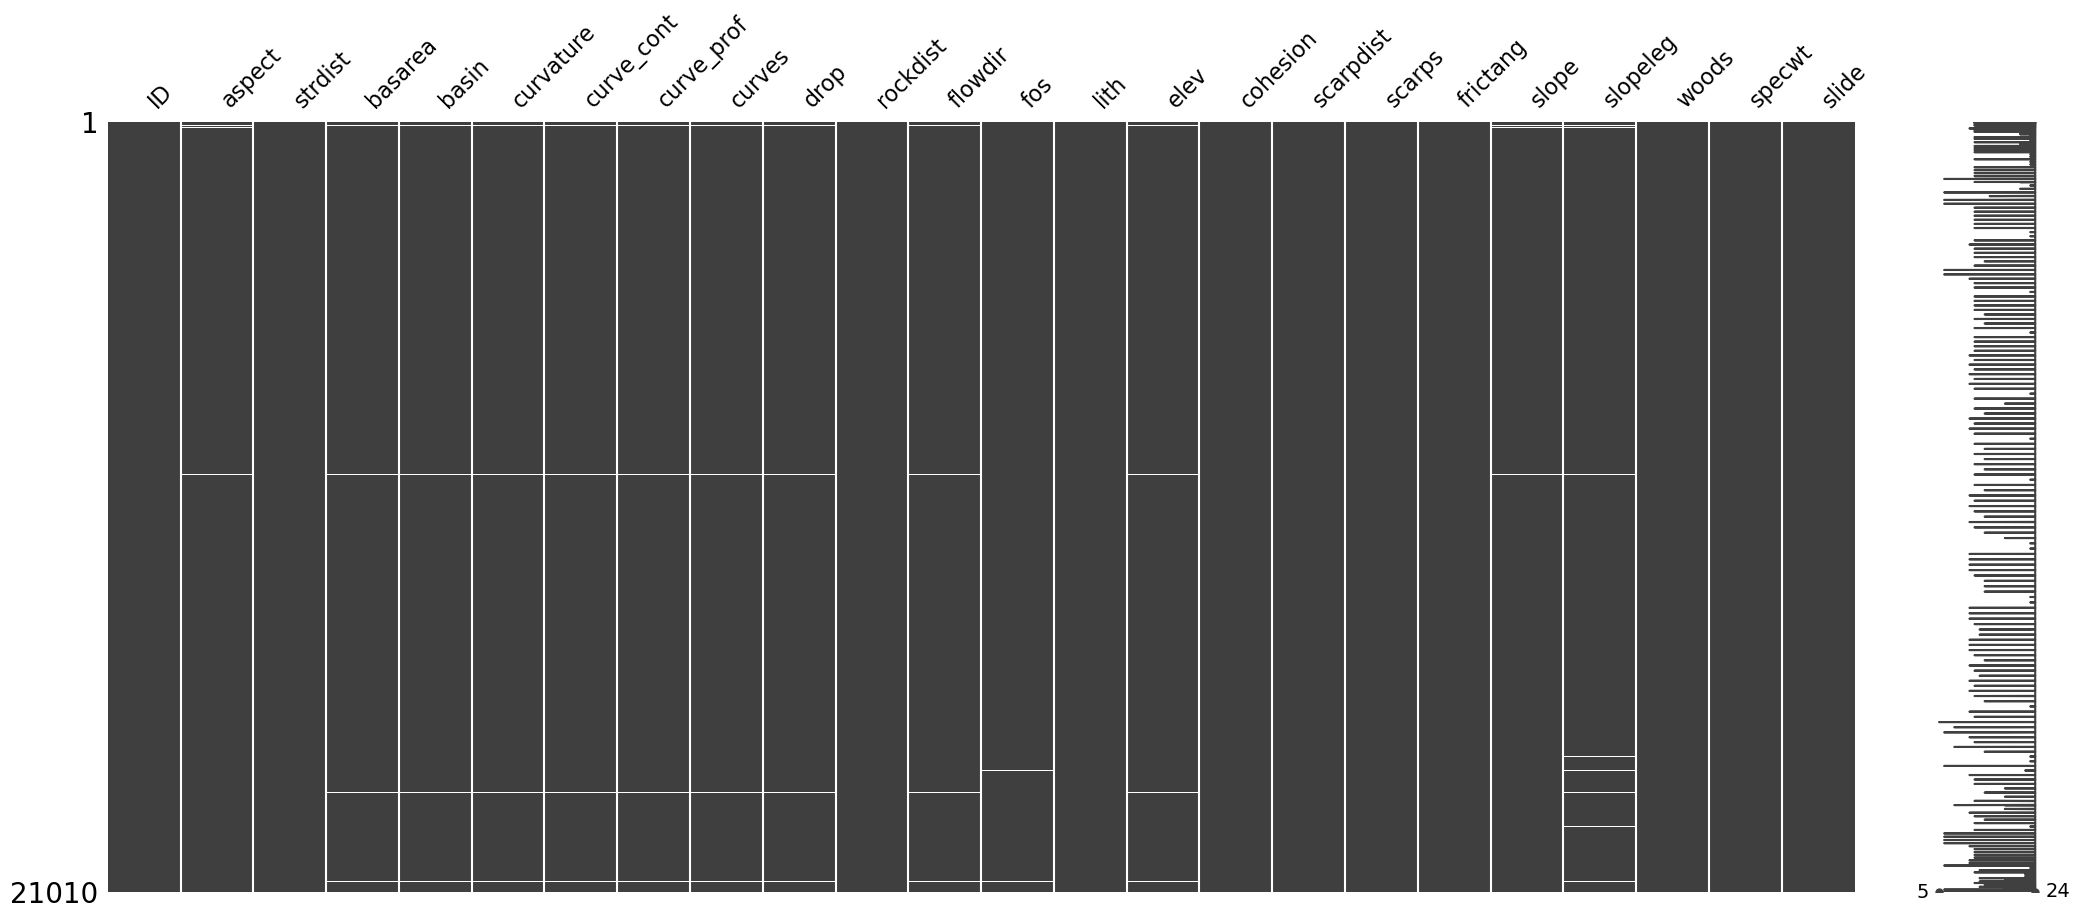

In [7]:
msno.matrix(df)

In [8]:
df.isna().sum()/df.shape[0]*100

ID            0.000000
aspect        0.685388
strdist       0.000000
basarea       0.775821
basin         0.775821
curvature     0.775821
curve_cont    0.775821
curve_prof    0.775821
curves        0.775821
drop          0.775821
rockdist      0.000000
flowdir       0.775821
fos           0.951928
lith          0.504522
elev          0.775821
cohesion      0.504522
scarpdist     0.000000
scarps        0.033317
frictang      0.504522
slope         0.685388
slopeleg      1.023322
woods         0.004760
specwt        0.504522
slide         0.504522
dtype: float64

If there are missing values in the dataset, the proportion of missing values in the dataset will be calculated and since the proportion in each feature is below 5% then it will be dropped, this is safe because the dataset will not lose much information.

In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

ID            0
aspect        0
strdist       0
basarea       0
basin         0
curvature     0
curve_cont    0
curve_prof    0
curves        0
drop          0
rockdist      0
flowdir       0
fos           0
lith          0
elev          0
cohesion      0
scarpdist     0
scarps        0
frictang      0
slope         0
slopeleg      0
woods         0
specwt        0
slide         0
dtype: int64

### Duplicate Data Identification

In [11]:
df.duplicated().sum()

0

No duplicate data found

### Imbalance Dataset Recognition

In [12]:
df['slide'].value_counts()

0     13701
1      6719
10      241
Name: slide, dtype: int64

In the target `slide` there are 3 values 0, 1, and 10. This target should only represent 0 for no landslide and 1 for landslide, so we will substitute the value 10 using the mode of the value in the target.

In [13]:
unwanted_target = ['slide']

for feature in unwanted_target:
    mode_value = df[feature].mode()[0]  
    df[feature] = df[feature].replace('10', mode_value) 

In [14]:
df['slide'].value_counts()

0    13942
1     6719
Name: slide, dtype: int64

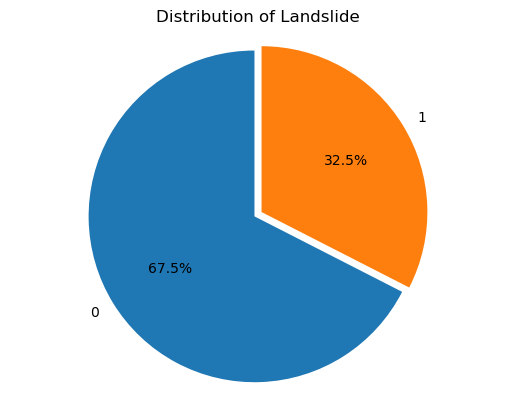

In [15]:
# Count the values in the 'slide' column
value_counts = df['slide'].value_counts()

# Create a pie chart
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, explode = [0.05, 0])
plt.title('Distribution of Landslide')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

The characteristics of the target `slide` are relatively quite imbalanced, so in machine learning modeling, oversampling techniques will be tried to overcome the problem of imbalance dataset.

### Data Type Manipulation

In [16]:
categoric_df = df.select_dtypes(include="object")

column = categoric_df.columns
unique = [categoric_df[i].unique() for i in column]
n_unique = [len(categoric_df[i].unique()) for i in column]

pd.DataFrame({
    'column': column,
    'n_unique': n_unique,
    'unique': unique
})

,column,n_unique,unique
0,aspect,20545,"[265.2971, 267.3936, 272.0991, 272.9689, 261.2..."
1,basarea,39,"[65600, 91600, 32800, 162800, 16400, 8800, 186..."
2,basin,48,"[1, 5, 2, 3, 4, 6, 10, 8, 9, 17, 11, 13, 15, 1..."
3,curvature,19750,"[-2.156464, 2.61673, 0.02902222, -1.793457, 2...."
4,curve_cont,20657,"[0.6360565, -2.301352, -0.07380137, 0.8819597,..."
5,curve_prof,20650,"[-1.520407, 0.3153775, -0.04477916, -0.9114974..."
6,curves,20615,"[0.214373, 0.1357629, 0.1649545, 0.2156545, 0...."
7,drop,155,"[25, 40, 42.5, 37.5, 20, 27.5, 15, 52.5, 45, 3..."
8,flowdir,8,"[16, 32, 64, 128, 8, 1, 2, 4]"
9,fos,20589,"[1.31829, 1.094124, 1.029149, 1.048767, 1.0077..."


Categorical features will be changed to numerical features, if the value in the feature represents a number with a comma then it will be changed to float data type to maintain precision, while if the feature represents an integer then it will be changed to integer data type.

In [17]:
float_columns = ['aspect', 'curvature', 'curve_cont', 'curve_prof','curves','drop','fos','elev','slope','slopeleg','slide']
df[float_columns] = df[float_columns].astype(float)

In [18]:
int_columns = ['basarea', 'basin', 'drop', 'flowdir','lith','cohesion','frictang','woods','specwt']
df[int_columns] = df[int_columns].astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20661 entries, 2 to 20997
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          20661 non-null  int64  
 1   aspect      20661 non-null  float64
 2   strdist     20661 non-null  float64
 3   basarea     20661 non-null  int32  
 4   basin       20661 non-null  int32  
 5   curvature   20661 non-null  float64
 6   curve_cont  20661 non-null  float64
 7   curve_prof  20661 non-null  float64
 8   curves      20661 non-null  float64
 9   drop        20661 non-null  int32  
 10  rockdist    20661 non-null  int64  
 11  flowdir     20661 non-null  int32  
 12  fos         20661 non-null  float64
 13  lith        20661 non-null  int32  
 14  elev        20661 non-null  float64
 15  cohesion    20661 non-null  int32  
 16  scarpdist   20661 non-null  float64
 17  scarps      20661 non-null  float64
 18  frictang    20661 non-null  int32  
 19  slope       20661 non-nul

### Outlier Detection

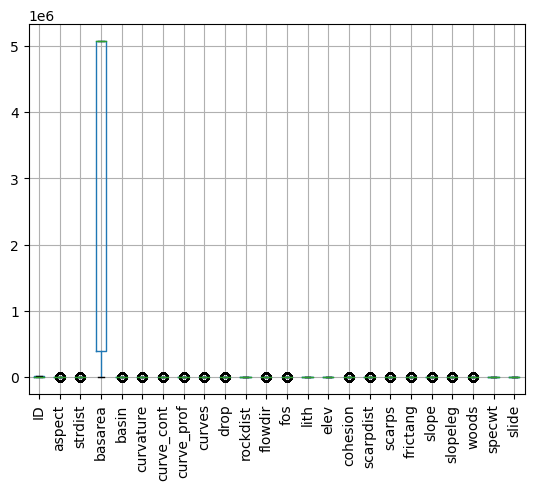

In [20]:
df.boxplot(rot=90);

There are no notable outliers, although there is a wide variation in values for the `basarea` feature.

### Correlation

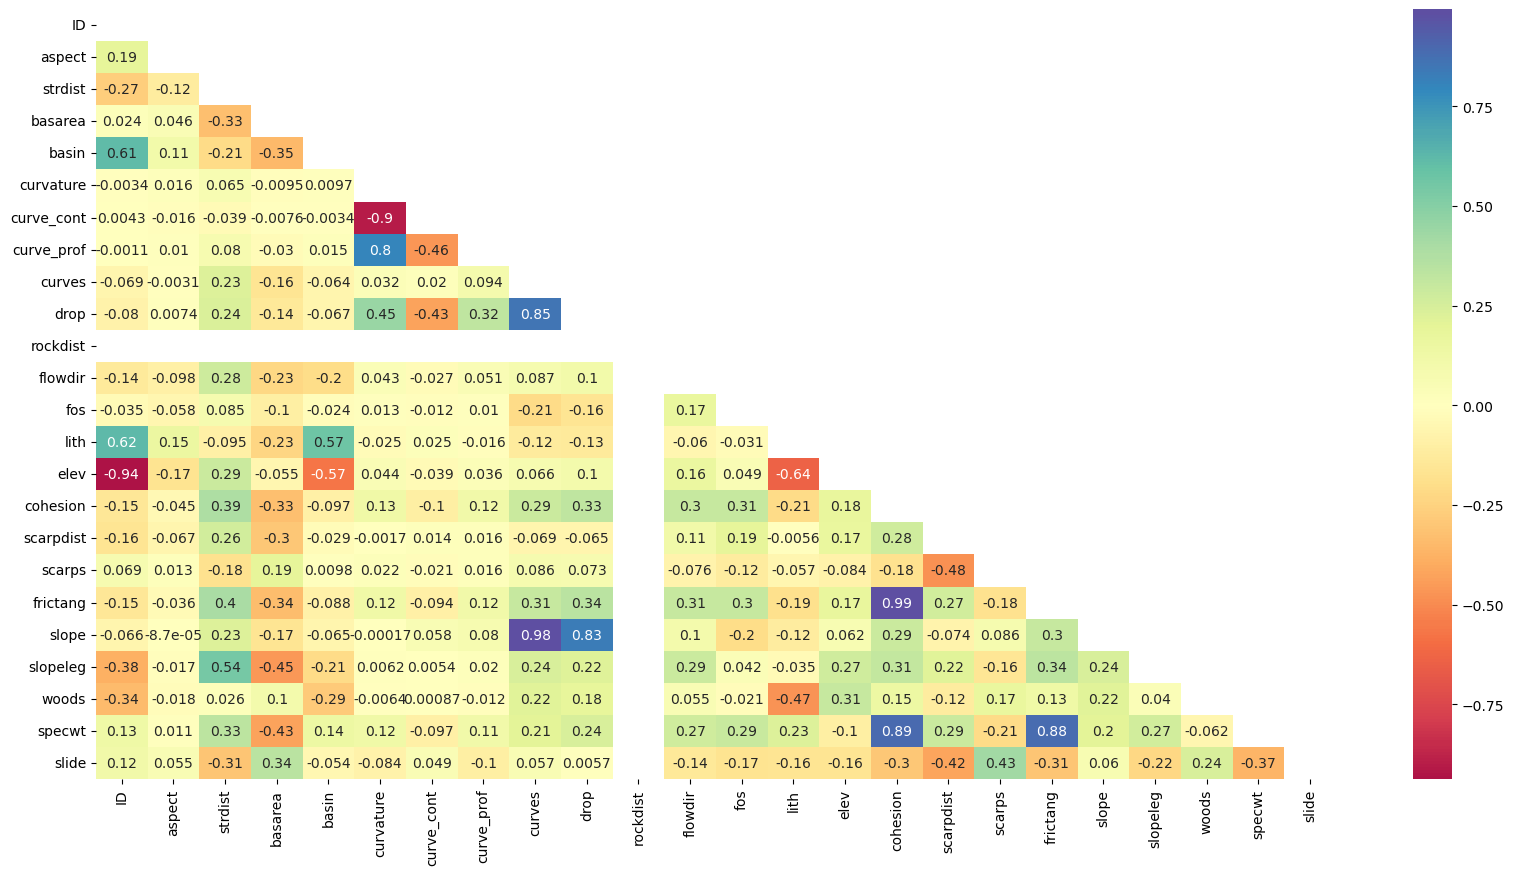

In [21]:
corrmat = df.corr(method='pearson')

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corrmat, dtype=bool))

plt.figure(figsize=(20,10))
sns.heatmap(corrmat, annot=True, cmap='Spectral', center=0, mask=mask)
plt.show()

Since the `ID` feature does not represent any meaningful information, it will be dropped. The correlation plot also shows that there is no correlation information on the `rockdist` feature so we will also drop it.

In [22]:
data_drop = ['ID','rockdist']
df = df.drop(data_drop, axis=1)

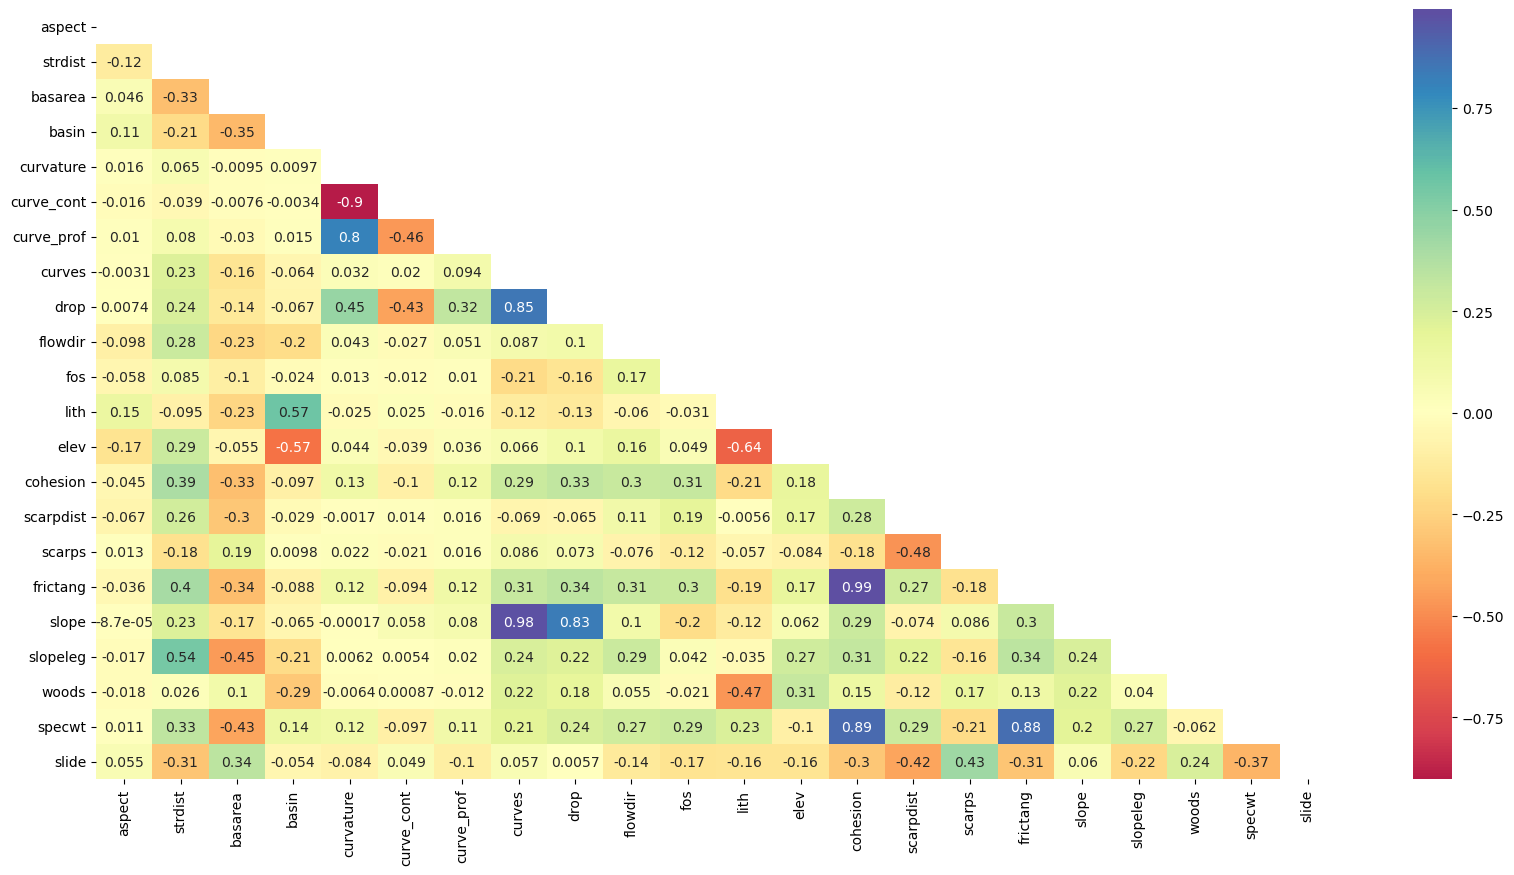

In [23]:
corrmat = df.corr(method='pearson')

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corrmat, dtype=bool))

plt.figure(figsize=(20,10))
sns.heatmap(corrmat, annot=True, cmap='Spectral', center=0, mask=mask)
plt.show()

From the correlation results, it can be seen that the `curve_cont` feature has a significant negative correlation with the `curvature` feature, while there are significant positive correlations in the `slope` and `curves` features and the `frictang` and `cohesion` features. To prevent information redundancy and improve the performance of the machine learning model, features with high correlation with other features will be dropped. Since the information about slope and friction angle is considered more representative, we drop the `curves` and `cohesion` features, and we choose to drop the `curvature` feature because it tends to have a high correlation with the `curve_prof` feature as well.

In [24]:
data_drop = ['curvature','curves','cohesion']
df = df.drop(data_drop, axis=1)

### Feature Engineering

In [25]:
df

,aspect,strdist,basarea,basin,curve_cont,curve_prof,drop,flowdir,fos,lith,elev,scarpdist,scarps,frictang,slope,slopeleg,woods,specwt,slide
2,265.29710,644.98060,65600,1,0.636057,-1.520407,25,16,1.318290,5,1057.0050,28.28427,0.0,23,15.346500,2024.0260,1,19,1.0
3,267.39360,647.76540,65600,1,-2.301352,0.315377,40,16,1.094124,5,1065.4200,20.00000,0.0,23,12.929210,2015.1060,1,19,1.0
6,272.09910,625.14000,65600,1,-0.073801,-0.044779,25,16,1.029149,5,1058.1380,20.00000,0.0,23,16.343020,1985.6690,1,19,1.0
7,272.96890,628.01280,65600,1,0.881960,-0.911497,25,16,1.048767,5,1063.3690,20.00000,0.0,23,16.766640,1976.5430,1,19,1.0
8,261.23460,631.50620,65600,1,-2.240553,0.483019,42,16,1.007705,5,1072.2200,20.00000,0.0,23,13.314640,1968.2010,1,19,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20992,48.78737,44.72136,301200,46,0.221850,-0.173520,13,128,4.778810,17,695.5321,188.67960,0.0,25,8.861807,718.3053,0,23,0.0
20993,34.03845,28.28427,301200,46,-0.185831,0.063315,10,64,4.338595,17,693.8918,178.88540,0.0,25,6.950380,732.5767,0,23,0.0
20994,13.14294,20.00000,301200,46,-0.722874,0.041592,12,64,8.775199,17,693.6766,170.88010,0.0,25,6.374033,748.3297,0,23,0.0
20996,33.78988,20.00000,301200,46,-1.101691,0.561166,30,64,5.946122,17,691.9956,161.24510,0.0,25,13.750470,782.4556,0,23,0.0


#### Aspect

This particular step is to separate two areas of slope. In simple, the data of Aspect are degrees, and we want to transform it into radians in the sense of cosine. In the end, we code it as a binary value of 1 (North) and 0 (South).

In [26]:
# Adjust the Aspect
for index, row in df.iterrows():
    df.loc[index, 'aspect'] = np.cos((row['aspect'] * np.pi) / 180)
    if df.loc[index, 'aspect'] > 0:
        df.loc[index, 'aspect'] = 1
    else:
        df.loc[index, 'aspect'] = 0

df.head()

,aspect,strdist,basarea,basin,curve_cont,curve_prof,drop,flowdir,fos,lith,elev,scarpdist,scarps,frictang,slope,slopeleg,woods,specwt,slide
2,0.0,644.9806,65600,1,0.636057,-1.520407,25,16,1.318290,5,1057.005,28.28427,0.0,23,15.34650,2024.026,1,19,1.0
3,0.0,647.7654,65600,1,-2.301352,0.315377,40,16,1.094124,5,1065.420,20.00000,0.0,23,12.92921,2015.106,1,19,1.0
6,1.0,625.1400,65600,1,-0.073801,-0.044779,25,16,1.029149,5,1058.138,20.00000,0.0,23,16.34302,1985.669,1,19,1.0
7,1.0,628.0128,65600,1,0.881960,-0.911497,25,16,1.048767,5,1063.369,20.00000,0.0,23,16.76664,1976.543,1,19,1.0
8,0.0,631.5062,65600,1,-2.240553,0.483019,42,16,1.007705,5,1072.220,20.00000,0.0,23,13.31464,1968.201,1,19,1.0


#### Factor of Safety

We have a feature called **Factor of Safety (FoS)**, which tells us about the slope's resisting forces to the driving forces. In order to get more knowledge about the data, especially for the Machine Learning model later, we **binned** such features into five classes, then we drop the `fos` feature itself

In [27]:
#Creating a label for fos classification 
class_fos_5 = []
for i in np.arange(5):
    class_fos_5.append('fos_'+str(i+1))

In [28]:
#Creating a Column for Binning Result using quantile
df['fos_5th_class'] = pd.qcut(df['fos'], q=5, labels=class_fos_5)
df[['fos','fos_5th_class']]

,fos,fos_5th_class
2,1.318290,fos_3
3,1.094124,fos_2
6,1.029149,fos_2
7,1.048767,fos_2
8,1.007705,fos_2
...,...,...
20992,4.778810,fos_5
20993,4.338595,fos_5
20994,8.775199,fos_5
20996,5.946122,fos_5


Text(0.5, 1.0, 'FoS Binning')

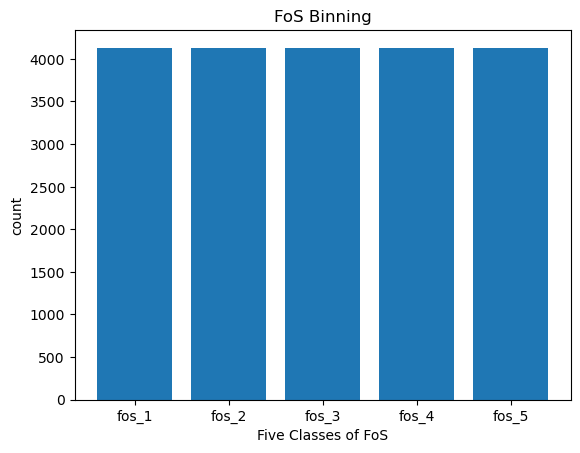

In [29]:
#Creating a Bar Chart after Quantile Binning
plt.bar(class_fos_5, df["fos_5th_class"].value_counts())

# set x/y labels and plot title
plt.xlabel("Five Classes of FoS")
plt.ylabel("count")
plt.title("FoS Binning")

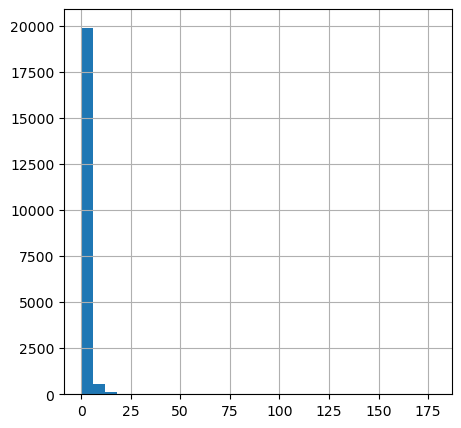

In [30]:
df['fos'].hist(bins = 30, figsize = (5,5));

In [31]:
data_drop = ['fos']
df = df.drop(data_drop, axis=1)

In [32]:
#FOS SEPARATION
fos = pd.get_dummies(df["fos_5th_class"])
fos.columns = ['fos_1','fos_2','fos_3','fos_4','fos_5']
df.drop(['fos_5th_class'],axis=1,inplace=True)
df = pd.concat([df,fos],axis=1)

df.head()

,aspect,strdist,basarea,basin,curve_cont,curve_prof,drop,flowdir,lith,elev,...,slope,slopeleg,woods,specwt,slide,fos_1,fos_2,fos_3,fos_4,fos_5
2,0.0,644.9806,65600,1,0.636057,-1.520407,25,16,5,1057.005,...,15.34650,2024.026,1,19,1.0,0,0,1,0,0
3,0.0,647.7654,65600,1,-2.301352,0.315377,40,16,5,1065.420,...,12.92921,2015.106,1,19,1.0,0,1,0,0,0
6,1.0,625.1400,65600,1,-0.073801,-0.044779,25,16,5,1058.138,...,16.34302,1985.669,1,19,1.0,0,1,0,0,0
7,1.0,628.0128,65600,1,0.881960,-0.911497,25,16,5,1063.369,...,16.76664,1976.543,1,19,1.0,0,1,0,0,0
8,0.0,631.5062,65600,1,-2.240553,0.483019,42,16,5,1072.220,...,13.31464,1968.201,1,19,1.0,0,1,0,0,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20661 entries, 2 to 20997
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   aspect      20661 non-null  float64
 1   strdist     20661 non-null  float64
 2   basarea     20661 non-null  int32  
 3   basin       20661 non-null  int32  
 4   curve_cont  20661 non-null  float64
 5   curve_prof  20661 non-null  float64
 6   drop        20661 non-null  int32  
 7   flowdir     20661 non-null  int32  
 8   lith        20661 non-null  int32  
 9   elev        20661 non-null  float64
 10  scarpdist   20661 non-null  float64
 11  scarps      20661 non-null  float64
 12  frictang    20661 non-null  int32  
 13  slope       20661 non-null  float64
 14  slopeleg    20661 non-null  float64
 15  woods       20661 non-null  int32  
 16  specwt      20661 non-null  int32  
 17  slide       20661 non-null  float64
 18  fos_1       20661 non-null  uint8  
 19  fos_2       20661 non-nul

### Normalization

We will use Robust scaling for normalization in data transformation to overcome different scales in our data features as well as the impact of outliers. This method is especially useful if your data contains outliers that can affect standard normalization

In [34]:
transformer = ColumnTransformer([("Robust Scalling", RobustScaler(), 
                         ['aspect','strdist', 'basarea','basin', 'curve_cont',
                         'curve_prof', 'drop','flowdir', 'lith', 'elev',
                         'scarpdist', 'scarps','frictang', 'slope', 'slopeleg',
                         'woods','specwt', 'fos_1','fos_2', 'fos_3', 'fos_4','fos_5'])], remainder='passthrough')

### Train Test Split

In [35]:
x = df.drop(columns=['slide'])
y = df['slide']

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=2021)

In [37]:
print(x_train.shape)
print(x_test.shape)

(16528, 22)
(4133, 22)


In [38]:
print(y_train.shape)
print(y_test.shape)

(16528,)
(4133,)


# Machine Learning Method

The selection of models implemented in machine learning modeling is a model that is a tree-based model to extract feature importance information in order to identify factors that influence the occurences of landslide. 

In [39]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier()
xgb_rf = XGBRFClassifier()
lgbm = lgb.LGBMClassifier()

The dataset has a difference between the amount of data for class 1 and 0, since the model will easily predict class 0, thus giving a high accuracy value, therefore that the accuracy metric cannot be used as the main metric because in this case, but still used as an additional metric for model quality preservation. Instead we will prioritize the use of ROC-AUC metric as the ROC-AUC metric is a value obtained by taking into account the true positive rate (TP / TP + FN) and false positive rate (FP / FP + TN) where the selection of this metrics is very suitable for the imbalanced dataset. **The ROC-AUC score that is closer to 1 means that the model is getting better at distinguishing the class 1 (landslide occurred) and 0 (landslide does not make occurred).**

In [40]:
models = [dt,rf,gb,xgb,xgb_rf,lgbm]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='roc_auc')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Decision Tree', 'Random Forest','GradientBoost','XGBoost','XGBoost RF', 'LightGBM'],'mean roc_auc':rata,'sdev':std}).set_index('model').sort_values(by='mean roc_auc',ascending=False)

,mean roc_auc,sdev
model,,
XGBoost,0.972876,0.000499
LightGBM,0.971698,0.000825
Random Forest,0.970325,0.000740
GradientBoost,0.948393,0.000891
XGBoost RF,0.941355,0.001338
Decision Tree,0.863167,0.004022


It can be seen that the XGBoost model is the best for roc_auc of any model that uses the default hyperparameters.

In [41]:
models = [dt,rf,gb,xgb,xgb_rf,lgbm]
score_roc_auc = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    x_train,x_test
    
    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)

for i,j in zip(models, ['Decision Tree', 'Random Forest','GradientBoost','XGBoost','XGBoost RF', 'LightGBM']):
    estimator,y_pred,x_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    score_roc_auc.append(roc_auc_score(y_test,y_predict_proba))
    print(j,'\n', classification_report(y_test,y_pred))
    
pd.DataFrame({'model':['Decision Tree', 'Random Forest','GradientBoost','XGBoost','XGBoost RF', 'LightGBM'],
             'roc_auc score':score_roc_auc}).set_index('model').sort_values(by='roc_auc score',ascending=False)

Decision Tree 
               precision    recall  f1-score   support

         0.0       0.91      0.91      0.91      2789
         1.0       0.82      0.82      0.82      1344

    accuracy                           0.88      4133
   macro avg       0.86      0.86      0.86      4133
weighted avg       0.88      0.88      0.88      4133

Random Forest 
               precision    recall  f1-score   support

         0.0       0.95      0.93      0.94      2789
         1.0       0.87      0.89      0.88      1344

    accuracy                           0.92      4133
   macro avg       0.91      0.91      0.91      4133
weighted avg       0.92      0.92      0.92      4133

GradientBoost 
               precision    recall  f1-score   support

         0.0       0.91      0.92      0.91      2789
         1.0       0.82      0.80      0.81      1344

    accuracy                           0.88      4133
   macro avg       0.86      0.86      0.86      4133
weighted avg       0.88   

,roc_auc score
model,
XGBoost,0.974819
Random Forest,0.974073
LightGBM,0.973240
GradientBoost,0.951446
XGBoost RF,0.943815
Decision Tree,0.864573


It appears that again the XGBoost model is the best performer on the test data. Let's now try oversampling our XGBoost model to see if we can get even better results.

### Imbalance Treatment

In [42]:
def calc_train_error(X_train, y_train, model):
#     '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    accuracy = accuracy_score(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='macro')
    roc_auc = roc_auc_score(y_train, predictProba[:,1])
    recall = recall_score(y_train, predictions)
    precision = precision_score(y_train, predictions)
    report = classification_report(y_train, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_validation_error(X_test, y_test, model):
#     '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    roc_auc = roc_auc_score(y_test, predictProba[:,1])
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
#     '''fits model and returns the in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [43]:
from sklearn.model_selection import StratifiedKFold

K = 10
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)

In [44]:
data = x_train
target = y_train

In [45]:
train_errors_without_oversampling = []
validation_errors_without_oversampling = []

train_errors_with_oversampling = []
validation_errors_with_oversampling = []

for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    Y_train, Y_val = target.iloc[train_index], target.iloc[val_index]
    
#     print(len(X_val), (len(X_train) + len(X_val)))
    ros = RandomOverSampler()

    X_ros, Y_ros = ros.fit_resample(X_train, Y_train)

    # instantiate model
    lgbm = lgb.LGBMClassifier()
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',lgbm)
    ])

    #calculate errors
    train_error_without_oversampling, val_error_without_oversampling = calc_metrics(X_train, Y_train, X_val, Y_val, estimator)
    train_error_with_oversampling, val_error_with_oversampling = calc_metrics(X_ros, Y_ros, X_val, Y_val, estimator)
    
    # append to appropriate list
    train_errors_without_oversampling.append(train_error_without_oversampling)
    validation_errors_without_oversampling.append(val_error_without_oversampling)
    
    train_errors_with_oversampling.append(train_error_with_oversampling)
    validation_errors_with_oversampling.append(val_error_with_oversampling)

In [46]:
listItem = []

for tr,val in zip(train_errors_without_oversampling,validation_errors_without_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.947092,0.921355,0.988405,0.975296,0.940480,0.911998,0.943572,0.916201,0.898799,0.852686
1,0.950319,0.916515,0.988957,0.973793,0.944178,0.905994,0.951013,0.895717,0.901626,0.854352
2,0.950319,0.905021,0.988888,0.968463,0.944088,0.892407,0.947706,0.865922,0.904161,0.845455
3,0.950723,0.900786,0.989266,0.965778,0.944536,0.888586,0.948315,0.875465,0.904734,0.829225
4,0.949983,0.923170,0.989080,0.975686,0.943695,0.912552,0.946868,0.882900,0.903888,0.881262
5,0.948908,0.915910,0.989145,0.976237,0.942531,0.904920,0.946868,0.884758,0.901043,0.860759
6,0.949580,0.918935,0.988554,0.974446,0.943270,0.908802,0.947281,0.899628,0.902501,0.858156
7,0.951664,0.921960,0.988778,0.974846,0.945606,0.912245,0.950176,0.905204,0.905794,0.861947
8,0.951398,0.906174,0.989498,0.967197,0.945311,0.894042,0.949773,0.873371,0.905419,0.843525
9,0.948172,0.923123,0.988635,0.977502,0.941768,0.913422,0.947912,0.905028,0.898335,0.864769


In [47]:
listItem = []

for tr,val in zip(train_errors_with_oversampling,validation_errors_with_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.952825,0.905626,0.988475,0.974215,0.952765,0.897132,0.988243,0.951583,0.922869,0.797192
1,0.953771,0.914096,0.989478,0.972867,0.953719,0.905482,0.987148,0.942272,0.925376,0.820097
2,0.953472,0.910466,0.988888,0.967867,0.953421,0.901249,0.986450,0.931099,0.925414,0.818331
3,0.955668,0.895342,0.989462,0.965633,0.955621,0.885439,0.988444,0.923792,0.927636,0.790143
4,0.951684,0.916515,0.988672,0.975401,0.951632,0.907694,0.984359,0.933086,0.923976,0.831126
5,0.951833,0.915306,0.989018,0.976295,0.951775,0.906962,0.986551,0.946097,0.922497,0.820968
6,0.952132,0.918330,0.988744,0.974561,0.952072,0.909812,0.987448,0.938662,0.922304,0.831960
7,0.953078,0.915910,0.988476,0.972977,0.953023,0.907664,0.987448,0.947955,0.923937,0.821256
8,0.951534,0.901332,0.989738,0.965480,0.951480,0.891599,0.985057,0.925512,0.923163,0.801613
9,0.953975,0.923729,0.988595,0.977301,0.953923,0.915901,0.987448,0.951583,0.925490,0.836334


It can be seen that the evaluation metrics results for recall of class positives are better after oversampling than those without oversampling but the precision of class positive guesses becomes slightly worse. This makes sense because we increase the positive class data to be equal to the amount of data from the negative class, where this will usually make the recall of the minority class go up but automatically make the precision go down.

The impact of this on our problem case means that our model after oversampling, gets more potential landslides than before, but slightly reduced in the precision of its guess for landslides that occur. This can lead to more landslides that occur but are not predicted to occur, which is very dangerous, causing the risk of accidents to be higher compared to model that is not oversampled. However, it should be noted that high precision still has the possibility of false alarms, where an landslide is predicted to occur when in reality it did not.

Therefore, for the case of landslide prediction, considering precision is more important than recall, we can use the model without oversampling instead.

In [48]:
for rep in validation_errors_without_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94      1116
         1.0       0.85      0.92      0.88       537

    accuracy                           0.92      1653
   macro avg       0.91      0.92      0.91      1653
weighted avg       0.92      0.92      0.92      1653

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94      1116
         1.0       0.85      0.90      0.87       537

    accuracy                           0.92      1653
   macro avg       0.90      0.91      0.91      1653
weighted avg       0.92      0.92      0.92      1653

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93      1116
         1.0       0.85      0.87      0.86       537

    accuracy                           0.91      1653
   macro avg       0.89      0.89      0.89      1653
weighted avg       0.91      0.91      0.91      1653

              preci

In [49]:
for rep in validation_errors_with_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

         0.0       0.97      0.88      0.93      1116
         1.0       0.80      0.95      0.87       537

    accuracy                           0.91      1653
   macro avg       0.89      0.92      0.90      1653
weighted avg       0.92      0.91      0.91      1653

              precision    recall  f1-score   support

         0.0       0.97      0.90      0.93      1116
         1.0       0.82      0.94      0.88       537

    accuracy                           0.91      1653
   macro avg       0.90      0.92      0.91      1653
weighted avg       0.92      0.91      0.92      1653

              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93      1116
         1.0       0.82      0.93      0.87       537

    accuracy                           0.91      1653
   macro avg       0.89      0.92      0.90      1653
weighted avg       0.92      0.91      0.91      1653

              preci

It can be seen that the model after oversampling has a lower precision of class 1 than class 0. Therefore, for this case, let's use a model that does not use oversampling to get a better precision in predicting landslides. Now let's try to perform hyperparameter tuning on our XGBoost model to get even better results. 

### Hyperparameter Tuning

In [50]:
xgb = XGBClassifier()

estimator=Pipeline([
    ('preprocess',transformer),
    ('model',xgb)
])

In [51]:
max_depth = [2,3,4]
learning_rate = [0.2,0.4,0.6]
n_estimators = [100,150,200]
subsample = [0.1,0.5,1]
gamma = [1,10]
reg_alpha = [0.01,0.1,1]

# Hyperparam space XGboost
hyperparam_space = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__reg_alpha': reg_alpha
}

Some of the hyperparameters commonly used in tuning XGBoost Regression include:

- max_depth: Specifies the maximum depth of each tree in the ensemble. Larger values tend to increase the complexity of the model and potentially lead to overfitting.

- learning_rate: Specifies the learning rate of the model. It controls how much each tree in the ensemble contributes to the final prediction. Smaller values result in a more conservative model, while larger values make the model more complex.

- n_estimators: Specifies the number of trees in the ensemble or iterations performed in the training process. The more trees, the more complex the model and the longer the training time required.

- subsample: Specifies the percentage of samples used in each iteration or tree. Smaller values reduce variability and speed up the training process, but can also cause performance degradation if too small.

- gamma: Specifies the threshold for tree pruning. Larger values make the model more conservative and reduce complexity.

- reg_alpha and reg_lambda: Specify regularization parameters to control model complexity and prevent overfitting. reg_alpha is used for L1 (LASSO) regularization, while reg_lambda is used for L2 (Ridge) regularization.

In [52]:
grid = GridSearchCV(estimator, n_jobs=-1, param_grid=hyperparam_space, scoring='roc_auc', cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))

In [53]:
grid.fit(x_train,y_train)
print(grid.best_score_)
print(grid.best_params_)

0.9682897040203553
{'model__gamma': 1, 'model__learning_rate': 0.6, 'model__max_depth': 4, 'model__n_estimators': 150, 'model__reg_alpha': 1, 'model__subsample': 1}


In [54]:
best_model = grid.best_estimator_
best_model.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Robust Scalling',
                                                  RobustScaler(),
                                                  ['aspect', 'strdist',
                                                   'basarea', 'basin',
                                                   'curve_cont', 'curve_prof',
                                                   'drop', 'flowdir', 'lith',
                                                   'elev', 'scarpdist',
                                                   'scarps', 'frictang',
                                                   'slope', 'slopeleg', 'woods',
                                                   'specwt', 'fos_1', 'fos_2',
                                                   'fos_3', 'fos_4',
                                                   'fos_5'])])),
                ('model',
                 XGBClassifier(...
                               feature_types=None, gamma=1, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.6,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=150,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [55]:
estimator=Pipeline([
    ('preprocess',transformer),
    ('model',xgb)
])
estimator.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Robust Scalling',
                                                  RobustScaler(),
                                                  ['aspect', 'strdist',
                                                   'basarea', 'basin',
                                                   'curve_cont', 'curve_prof',
                                                   'drop', 'flowdir', 'lith',
                                                   'elev', 'scarpdist',
                                                   'scarps', 'frictang',
                                                   'slope', 'slopeleg', 'woods',
                                                   'specwt', 'fos_1', 'fos_2',
                                                   'fos_3', 'fos_4',
                                                   'fos_5'])])),
                ('model',
                 XGBClassifier(...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [56]:
y_pred_default = estimator.predict(x_test)
y_pred_proba_default = estimator.predict_proba(x_test)
y_pred_tuned = best_model.predict(x_test)
y_pred_proba_tuned = best_model.predict_proba(x_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

print('ROC AUC Score Default XGB : ', roc_auc_default)
print('ROC AUC Score Tuned XGB : ', roc_auc_tuned)

ROC AUC Score Default XGB :  0.9748194970889036
ROC AUC Score Tuned XGB :  0.9712091720876231


It turns out that model optimization through hyperparameter tuning causes the ROC-AUC metric to decrease.

In [57]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default XGB : \n', report_default)
print('Classification Report Tuned XGB : \n', report_tuned)

Classification Report Default XGB : 
               precision    recall  f1-score   support

         0.0       0.95      0.93      0.94      2789
         1.0       0.87      0.89      0.88      1344

    accuracy                           0.92      4133
   macro avg       0.91      0.91      0.91      4133
weighted avg       0.92      0.92      0.92      4133

Classification Report Tuned XGB : 
               precision    recall  f1-score   support

         0.0       0.94      0.93      0.94      2789
         1.0       0.86      0.88      0.87      1344

    accuracy                           0.92      4133
   macro avg       0.90      0.91      0.91      4133
weighted avg       0.92      0.92      0.92      4133



From the classification report, the precision, recall, and F-1 score metrics for class 1 have also decreased, meaning that the tuning model has decreased performance in predicting class 1. Therefore, we will use the non-tuned XGBoost model as our final model.

### Feature Importances

In [58]:
x_train_preprocess1 = transformer.fit_transform(x_train)
x_test_preprocess1 = transformer.transform(x_test)

In [59]:
x_train_preprocess1 = pd.DataFrame(x_train_preprocess1)
x_test_preprocess1 = pd.DataFrame(x_test_preprocess1)

In [60]:
transformer.transformers_

[('Robust Scalling',
  RobustScaler(),
  ['aspect',
   'strdist',
   'basarea',
   'basin',
   'curve_cont',
   'curve_prof',
   'drop',
   'flowdir',
   'lith',
   'elev',
   'scarpdist',
   'scarps',
   'frictang',
   'slope',
   'slopeleg',
   'woods',
   'specwt',
   'fos_1',
   'fos_2',
   'fos_3',
   'fos_4',
   'fos_5'])]

In [61]:
feature_names = ['aspect', 'strdist', 'basarea', 'basin',
                'curve_cont', 'curve_prof', 'drop', 'flowdir',
                'lith', 'elev', 'scarpdist', 'scarps',
                'frictang', 'slope', 'slopeleg', 'woods',
                'specwt', 'fos_1', 'fos_2', 'fos_3', 'fos_4','fos_5']

In [62]:
x_train_preprocess1.shape

(16528, 22)

In [63]:
len(feature_names)

22

In [64]:
x_train_preprocess1.columns = feature_names
x_test_preprocess1.columns = feature_names

In [65]:
xgb = XGBClassifier(random_state=1)
xgb.fit(x_train_preprocess1,y_train)
y_pred = xgb.predict(x_test_preprocess1)

In [66]:
feature_importances = xgb.feature_importances_

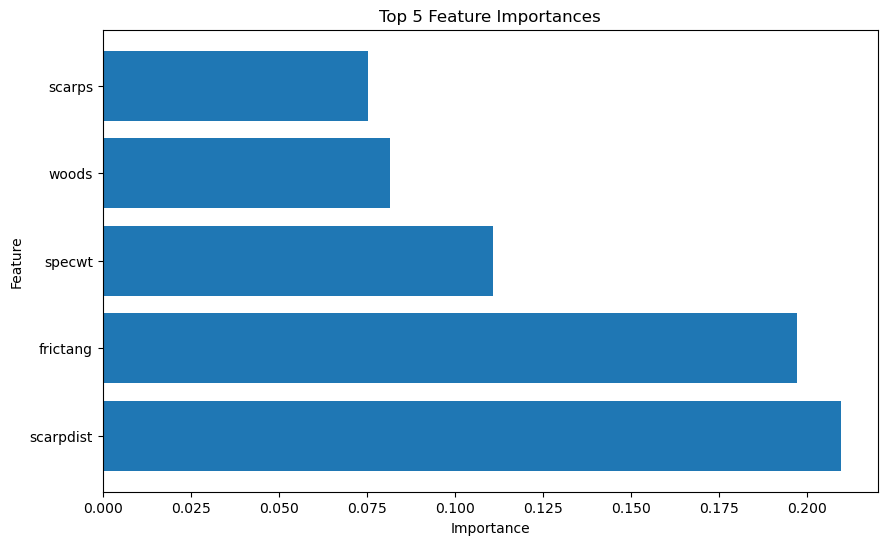

In [71]:
# Create a DataFrame with feature names and importances
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Plot the top n feature importances
n = 5  # Number of top features to display
top_features_df = feature_importances_df.head(n)

plt.figure(figsize=(10, 6))
plt.barh(top_features_df['Feature'], top_features_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title(f'Top {n} Feature Importances')
plt.show()

The top five influential features in predicting landslides using the XGBoost classifier are `scarpdist` (distance to previous failure scarps), `frictang` (friction angle), `specwt` (specific weight of soil), `woods` (presence of vegetation), and `scarps` (existence of failure scarps). The proximity to previous failure scarps indicates most likely increased landslide risk, while a lower friction angle and lower specific weight of soil may suggest reduced stability. The presence of vegetation reinforces the soil, decreasing the likelihood of landslides. Additionally, the existence of scarps signifies potential soil instability. Collectively, these features contribute significantly to the model's ability to predict landslides accurately.

# Business Implementation

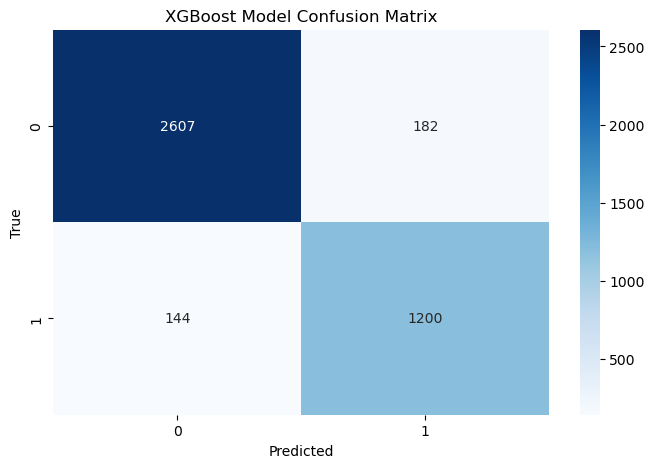

In [73]:
cm = confusion_matrix(y_test, y_pred_default)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('XGBoost Model Confusion Matrix')
plt.show()

Based on the classification report results of our model (Default XGBoost model), we can conclude that if we later use our model to predict the occurrences of landslide, then our model can identify 93% (recall class 0) of landslides which will not occur so that stakeholders would not have to worry about preparing funds for landslide predictions that will not occur, and our model can get 89% (recall class 1) of landslides that will occur from all landslides that happened. (all of this is based on recall)

Our model has a prediction of occurred landslide of 87% (precision class 1), so every time our model predicts that a landslide that occur, the probability of guessing correctly is 87% or so. However, there will still be landslides who are not actually happened but are predicted as landslide about 7% or 182 (false positive) landslides that are considered as false alarms, this will be economically detrimental because we allocate funds for mitigation as the prediction results say it will happen when in fact the landslide did not happen. Moreover, there are still 11% or 144 (false negative) landslides that were predicted not to occur but actually did occur, this needs to be considered as it is dangerous and having the risk of causing casualties or damage.

**Business Scenario:**

If the cost to mitigate per landslide is $ 500 and if the number of landslide that possibly happen is 1,000 (of which 500 are most likely to happen, and 500 are not most likely to happen), then the calculation would be something like this:

No Models (all landslides we anticipate):

    Total Cost => 1,000 x 500 USD = 500,000 USD, because we anticipated all of the landslides
    Total savings => 0 USD

With the Model (only landslides predicted by the model are occurring that we mitigate):

    Total Cost => ((0.89 x 500) x 500 USD) + ((0.07 x 500) x 500 USD) = 240,000 USD
    Total landslide that will occur => 0.89 x 500 = 445 landslide (because the recall of 1/occurrence of landslide is 89%)
    Total landslide that fail to be anticipated => 0.11 x 500 = 55 landslide (because recall 1/occurrence of landslide 89%)
    Wasted cost by false alarm => (0.07 x 500) x 500 USD = 17,500 USD (based on recall 0/not occurrences of landslide)
    Total savings => 0.93 x 500 x 500 USD = 232,500 USD (only those landslides not occur are counted, those landslides occur but not anticipated are not counted here)

In terms of business implementation, it can be seen that landslide prediction by using our model has advantages such as:

1. **The company will have 52 % cheaper operational costs.**

       Percentage Cheaper Cost Allocation = ((Cost without ML − Cost with ML) / Cost without ML) x 100 %
   
       Percentage Cheaper Cost Allocation = ((500,000 − 240,000) / 500,000) x 100 % = 52 %
   
2. **The company saves 53.5% of operational costs.**

       Percentage Saving Cost Allocation = ((Cost without ML − Saving Cost with ML) / Cost without ML) x 100 %
   
       Percentage Saving Cost Allocation = ((500,000 − 232,500) / 500,000) x 100 % = 53.5%

The weaknesses of the machine learning model that need to be anticipated include:

1. **There were 7% false alarms and the cost wasted due to false alarms was 17,500 USD.**

   
2. **There are 11% of landslides that are not detected by the model or 55 landslides that will be missed, putting the landslide at risks.**


# Conclusion and Recommendation

### Conclusion

In [68]:
print('Selected Model ROC-AUC:',roc_auc_default)

Selected Model ROC-AUC: 0.9748194970889036


In [69]:
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94      2789
         1.0       0.87      0.89      0.88      1344

    accuracy                           0.92      4133
   macro avg       0.91      0.91      0.91      4133
weighted avg       0.92      0.92      0.92      4133



   1. The best machine learning model used was the non-tuned XGBoost Model without oversampling, with metric values as shown above. The ROC-AUC score that is closer to 1 means that the model is excellent at distinguishing the class 1 (occurrence of landslide) and 0 (no occurrence of landslide).

   2. The factor that most influences the occurrences of landslide is the distance to previous failure scarps, followed by friction angle, specific weight of soil, presence of vegetation, and the existence of failure scarps. 
  
   3. The results showed that applying the untuned XGBoost Model under the business scenario above, will resulted in 52% less operational cost of landslide mitigation compared to not applying machine learning modeling, and with the machine learning model was able to provide 53.5% cost savings. However, the model introduced a false alarm rate of 7%, which incurred cost losses, and also missed 11% of landslides, potentially putting some landslides at risk.

### Recommendation

- It is recommended that stakeholders use machine learning models to predict the occurrence of landslides, because the model used has a precision of 87% where the probability of guessing correctly is 87% and the ability of the model to distinguish classes 1 and 0 in the data also has excellent performance with a ROC-AUC score of 97%.
- Referring to the machine learning model and scenario to anticipate the possibility of 1000 landslides with mitigation cost per landslide of 500 USD, it is suggested that stakeholders should prepare at least 240,000 USD as fund allocation for landslide mitigation program. 
- Locations with characteristics such as close proximity to the scarp or on the scarp, low friction angle and specific weight of soil, and absence of vegetation in those locations need to be considered and prioritized by stakeholders in developing landslide mitigation strategies. Areas with these characteristics are prone to landslides, if referring to the results of feature importance evaluation of machine learning modeling.
- Stakeholders need to add spatial information such as longitude and latitude so that data analysis using a geospatial approach can be carried out. In addition, it is also possible to integrate geographic information system (GIS) with machine learning so that predictions of landslides that will occur, false alarms, and predictions of landslides that are missed can be tracked, which makes it easier to develop landslide mitigation strategies. Anticipating false alarms and missed landslide predictions with spatial data will reduce the risk of casualties, damages, and economic losses.

### References

Cui, P., Chen, XQ., Zhu, YY. et al. 2011.The Wenchuan Earthquake (May 12, 2008), Sichuan Province, China, and resulting geohazards. Nat Hazards 56, 19–36. https://doi.org/10.1007/s11069-009-9392-1

Gan, J., and Zhang, Y.X., 2019. Failure modes of loose landslide deposits in 2008 Wnchuan earthquake area in China. Nat. Hazards Earth Syst. Sci. Discuss. https://doi.org/10.5194/nhess-2019-25